In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("UserCarData.csv")
df.shape

(7906, 18)

Dataset contains around 7906 cars examples.
The dataset has features like Location, Manufacture details, car features such as Fuel type, Engine, and usage parameters

In [3]:
df.head(2)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sales_ID           7906 non-null   int64 
 1   name               7906 non-null   object
 2   year               7906 non-null   int64 
 3   selling_price      7906 non-null   int64 
 4   km_driven          7906 non-null   int64 
 5   Region             7906 non-null   object
 6   State or Province  7906 non-null   object
 7   City               7906 non-null   object
 8   fuel               7906 non-null   object
 9   seller_type        7906 non-null   object
 10  transmission       7906 non-null   object
 11  owner              7906 non-null   object
 12  mileage            7906 non-null   object
 13  engine             7906 non-null   object
 14  max_power          7906 non-null   object
 15  torque             7906 non-null   object
 16  seats              7906 non-null   int64 


There are no missing values in the dataset

# Data Cleaning

Removing units from values from columns Engine, Max_power and Mileage  

In [6]:
df['engine'] = df['engine'].str.replace('CC', '').astype(int)
df['max_power'] = df['max_power'].str.replace(' bhp', '').astype(float)

In [7]:
Correct_Mileage= []
for i in df.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Correct_Mileage.append(float(i))

In [8]:
df['mileage']=Correct_Mileage

In [9]:
df=df.rename(columns={"State or Province":"State_Province"})

# Feature Engineering 

If we observe the cars name, First word in the Names corressponds to Brand and rest of it corresponds to Model name, series. Along with "brand" we need to decide how many words to keep after Brand which makes Model feature.

In [10]:
df["Brand"] = df["name"].apply(lambda x : x.split()[0])

In [11]:
df["name"] = df["name"].apply(lambda x : " ".join(x.split()[:2]))

In [12]:
df.head(2)

,Sales_ID,name,year,selling_price,km_driven,Region,State_Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,Brand
0,1,Maruti Swift,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.0,1248,74.00,190Nm@ 2000rpm,5,Y,Maruti
1,2,Skoda Rapid,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.1,1498,103.52,250Nm@ 1500-2500rpm,5,Y,Skoda


In [13]:
df['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [14]:
df['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [15]:
df['seats'].value_counts()

5     6254
7     1120
8      235
4      133
9       80
6       62
10      19
2        2
14       1
Name: seats, dtype: int64

In [16]:
df['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [17]:
df.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.277651,1458.708829,91.587374,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.282150,503.893057,35.747216,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.500000,1197.000000,68.050000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.000000,1248.000000,82.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.000000,1582.000000,102.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,46.816000,3604.000000,400.000000,14.000000


# Exporting cleaned dataset for visualization process

In [18]:
df.to_csv("Cleaned.csv") # Refer visualization ppt for complete details

# Understanding the data

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'selling_price'}>,
        <AxesSubplot:title={'center':'km_driven'}>],
       [<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'engine'}>,
        <AxesSubplot:title={'center':'max_power'}>],
       [<AxesSubplot:title={'center':'seats'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

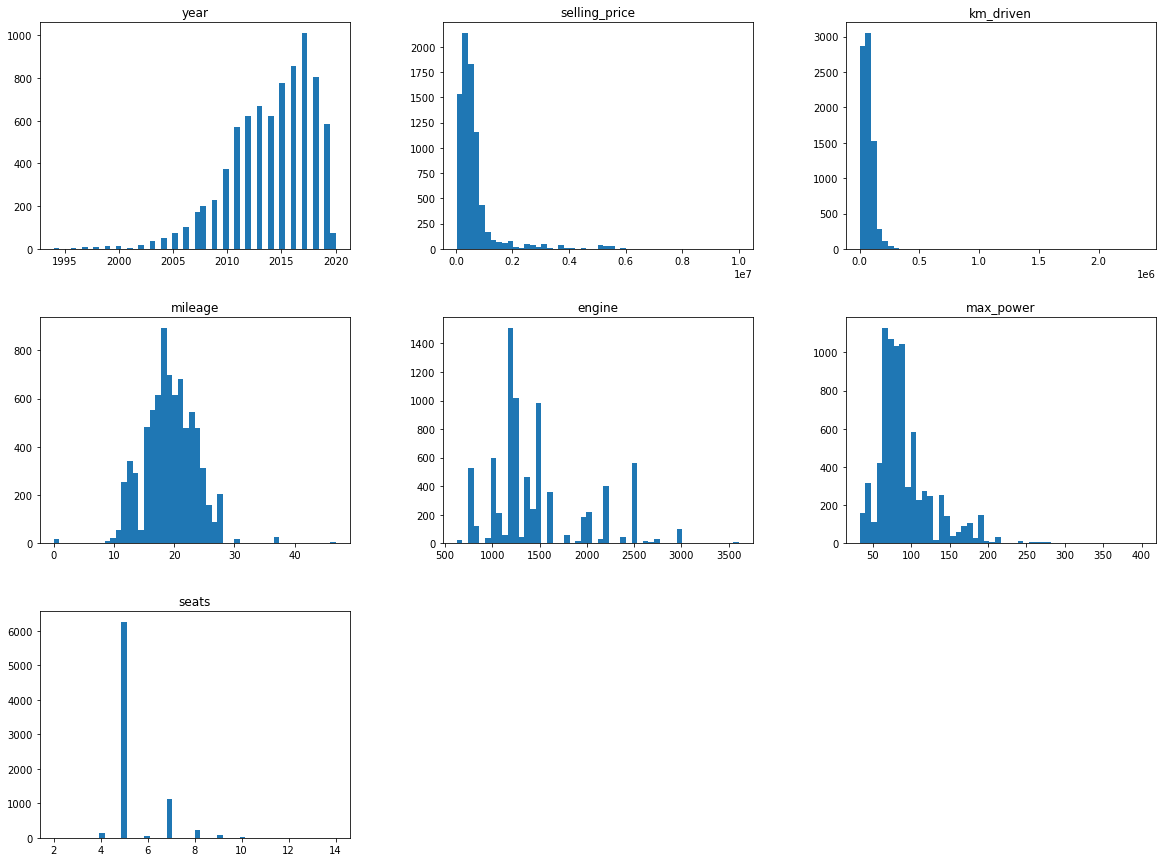

In [19]:
df_hist=df.drop("Sales_ID", axis=1)
df_hist.hist(figsize=(20,15), bins=50, grid=False)

[Text(0, 0, '802450'),
 Text(0, 0, '472665'),
 Text(0, 0, '210886'),
 Text(0, 0, '317904')]

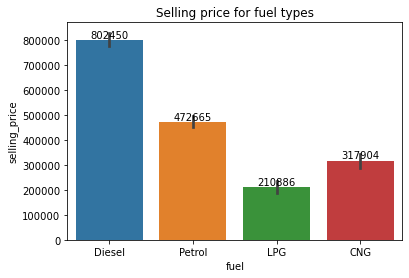

In [20]:
ax=sns.barplot(x='fuel', y='selling_price', data=df)
plt.title("Selling price for fuel types")
ax.bar_label(ax.containers[0])

[Text(0, 0, '630165'),
 Text(0, 0, '637718'),
 Text(0, 0, '625796'),
 Text(0, 0, '720585')]

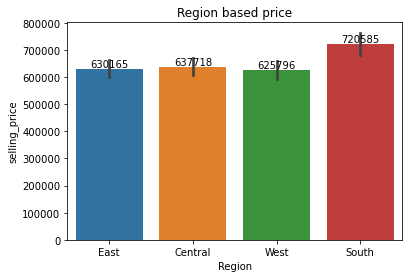

In [21]:
ax=sns.barplot(x='Region', y='selling_price', data=df)
plt.title("Region based price")
ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='Region', ylabel='count'>

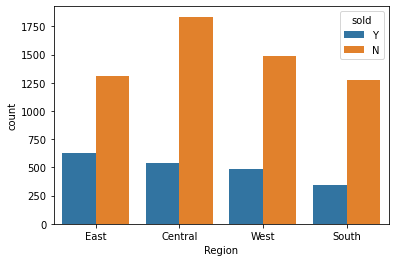

In [22]:
sns.countplot(x='Region', hue='sold', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Skoda'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Chevrolet'),
  Text(10, 0, 'Datsun'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Mercedes-Benz'),
  Text(13, 0, 'Mitsubishi'),
  Text(14, 0, 'Audi'),
  Text(15, 0, 'Volkswagen'),
  Text(16, 0, 'BMW'),
  Text(17, 0, 'Nissan'),
  Text(18, 0, 'Lexus'),
  Text(19, 0, 'Jaguar'),
  Text(20, 0, 'Land'),
  Text(21, 0, 'MG'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'Daewoo'),
  Text(24, 0, 'Kia'),
  Text(25, 0, 'Fiat'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Ashok'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Opel')])

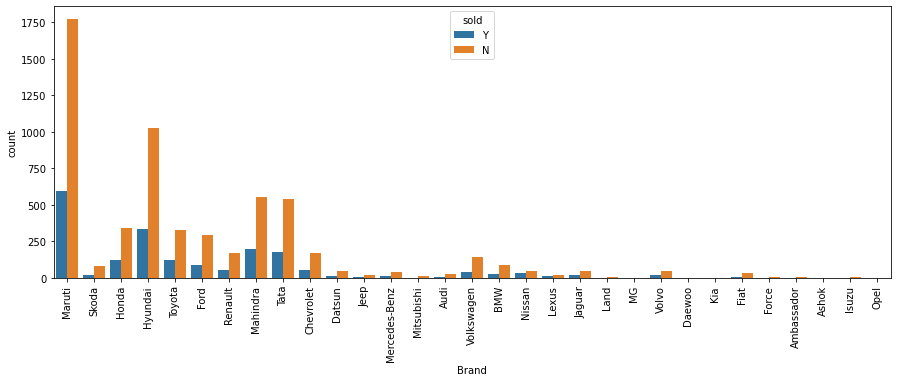

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(x='Brand', hue='sold', data=df)
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Individual'),
  Text(1, 0, 'Dealer'),
  Text(2, 0, 'Trustmark Dealer')])

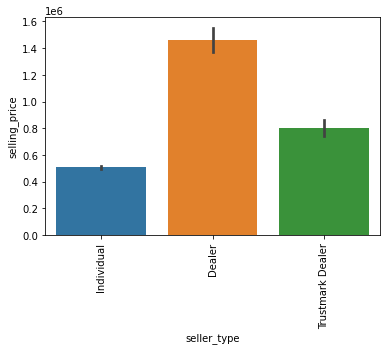

In [24]:
sns.barplot(x="seller_type", y="selling_price", data=df)
plt.xticks(rotation=90)

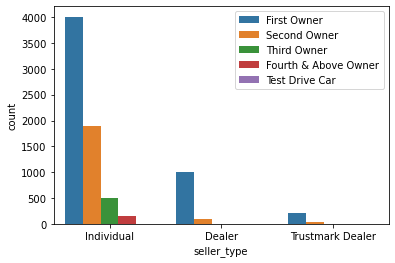

In [25]:
ax=sns.countplot(x='seller_type', hue='owner', data=df)
plt.legend(loc='upper right')    

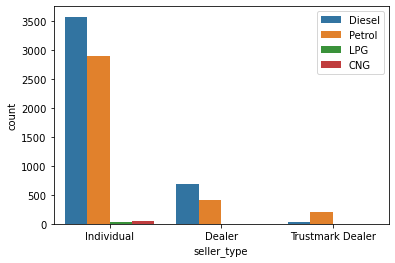

In [26]:
sns.countplot(x='seller_type', hue='fuel', data=df)
plt.legend(loc='upper right')

<AxesSubplot:xlabel='seller_type', ylabel='count'>

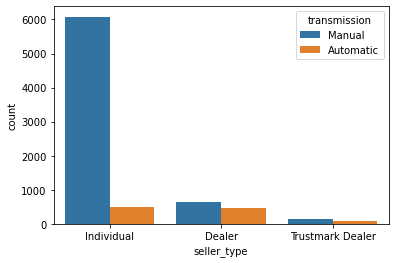

In [27]:
sns.countplot(x='seller_type', hue='transmission', data=df)

<Figure size 1080x360 with 0 Axes>

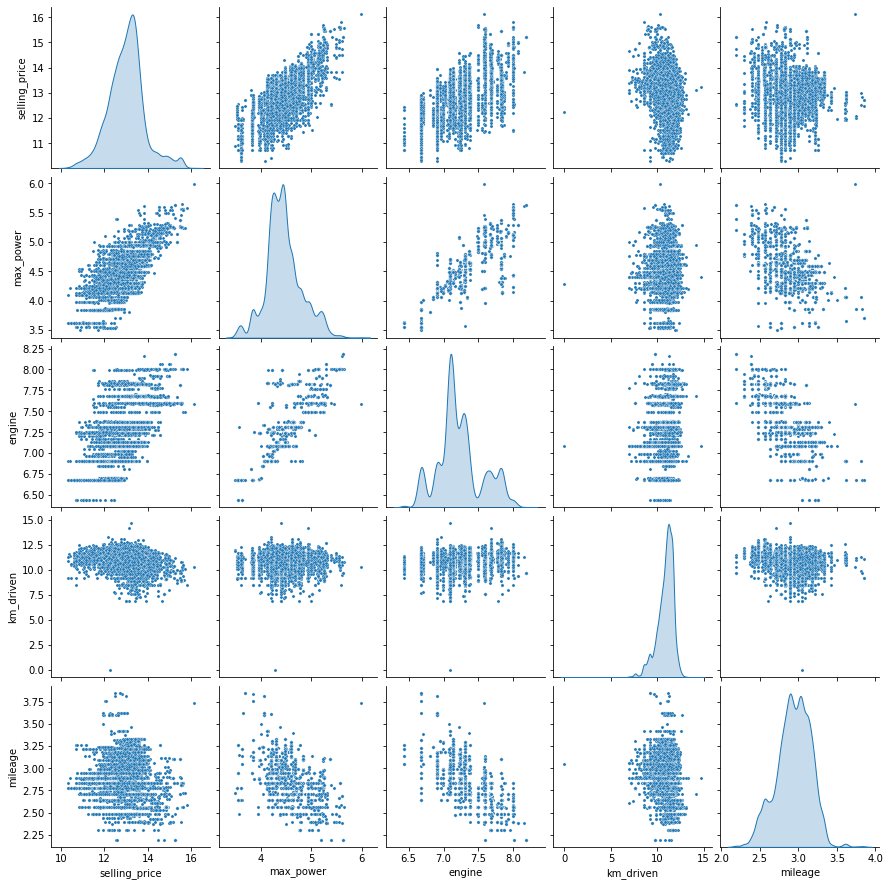

In [28]:
pair_plots=df[['selling_price', 'max_power', 'engine', 'km_driven', 'mileage']]
plt.figure(figsize=(15,5))
sns.pairplot(data=pair_plots.apply(np.log), diag_kind="kde", plot_kws={"s": 10})

In [29]:
df1=df.copy()

# Treating outliers

In [30]:
def boxplot(column):
    sns.boxplot(data=df1,x=df1[f"{column}"])
    plt.title(f"Boxplot of {column}")
    plt.show()

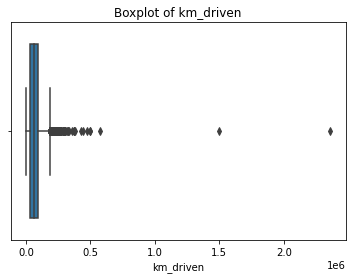

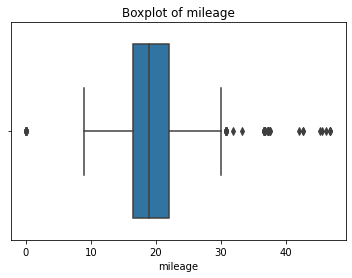

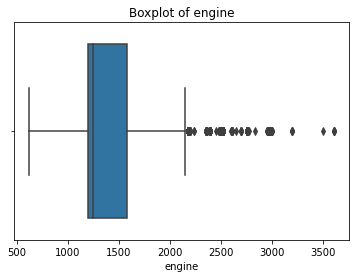

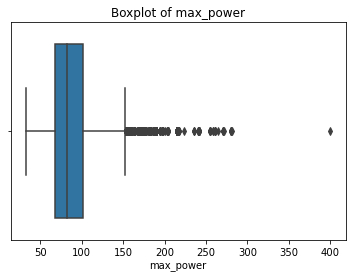

In [31]:
boxplot('km_driven')
boxplot('mileage')
boxplot('engine')
boxplot('max_power')

In [32]:
def outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper=q3+(1.5*IQR)
    lower=q1-(1.5*IQR)
    df.loc[df>upper]=upper
    df.loc[df<lower]=lower
    df= np.where(df > upper, df, np.where(df < lower, lower, df))
    return df

In [33]:
df1['km_driven']=outliers(df1['km_driven'])
df1['mileage']=outliers(df1['mileage'])
df1['engine']=outliers(df1['engine'])
df1['max_power']=outliers(df1['max_power'])

C:\Users\renuka\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


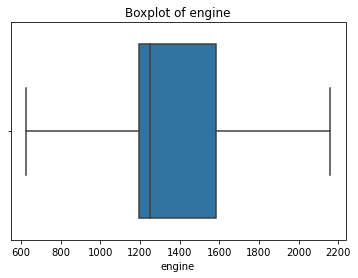

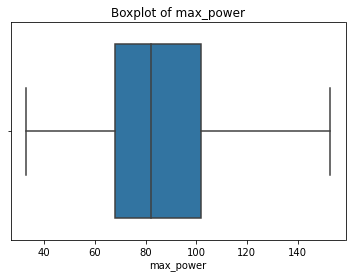

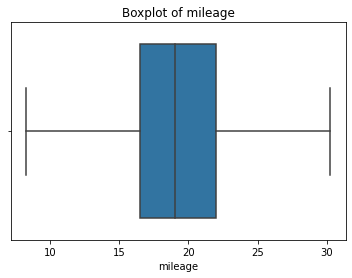

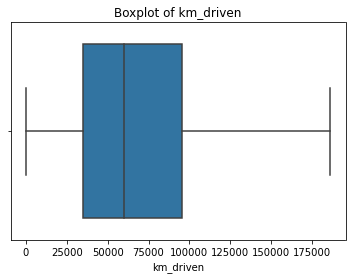

In [34]:
boxplot('engine')
boxplot('max_power')
boxplot('mileage')
boxplot('km_driven')

In [35]:
df1['sold'].replace(['N', 'Y'], [0, 1], inplace=True)

# Converting categorical to numerical

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
cols=['name', 'Region', 'State_Province', 'City', 'fuel', 'seller_type',
          'transmission', 'owner', 'Brand']
cols

['name',
 'Region',
 'State_Province',
 'City',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'Brand']

In [39]:
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)
df1[cols]

,name,Region,State_Province,City,fuel,seller_type,transmission,owner,Brand
0,120,1,7,1223,1,1,1,0,20
1,155,1,30,786,1,1,1,2,26
2,55,0,11,193,3,1,1,4,10
3,75,0,11,193,1,1,1,0,11
4,120,1,30,786,3,1,1,0,20
...,...,...,...,...,...,...,...,...,...
7901,75,0,41,922,3,1,1,0,11
7902,72,0,41,935,1,1,1,1,11
7903,120,0,41,935,1,1,1,0,20
7904,163,1,19,658,1,1,1,0,27


# We are dropping the columns that do not affect the target variable

In [40]:
df1.drop(columns=['Region', 'year', 'Sales_ID', 'name','torque', 'Brand', 'State_Province', 'City'],inplace=True)

# Correlation analysis

In [41]:
corr=df1.corr()
corr

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
selling_price,1.000000,-0.283516,-0.193332,-0.337022,-0.590269,-0.224413,-0.128716,0.465822,0.636124,0.041617,0.018997
km_driven,-0.283516,1.000000,-0.343328,0.148412,0.250823,0.349564,-0.193137,0.229826,-0.022239,0.260180,-0.004010
fuel,-0.193332,-0.343328,1.000000,0.110267,-0.034839,-0.030725,-0.103084,-0.527437,-0.315393,-0.341640,0.026840
seller_type,-0.337022,0.148412,0.110267,1.000000,0.230112,0.142435,-0.015132,-0.116128,-0.215802,0.052688,0.006842
transmission,-0.590269,0.250823,-0.034839,0.230112,1.000000,0.148474,0.176398,-0.286377,-0.473043,0.072722,-0.019495
owner,-0.224413,0.349564,-0.030725,0.142435,0.148474,1.000000,-0.166182,0.006431,-0.101447,0.028853,-0.002731
mileage,-0.128716,-0.193137,-0.103084,-0.015132,0.176398,-0.166182,1.000000,-0.563121,-0.399078,-0.454682,-0.032352
engine,0.465822,0.229826,-0.527437,-0.116128,-0.286377,0.006431,-0.563121,1.000000,0.773942,0.587112,0.008346
max_power,0.636124,-0.022239,-0.315393,-0.215802,-0.473043,-0.101447,-0.399078,0.773942,1.000000,0.248939,0.006742
seats,0.041617,0.260180,-0.341640,0.052688,0.072722,0.028853,-0.454682,0.587112,0.248939,1.000000,0.010076


In [42]:
corr['selling_price'].sort_values(ascending=False)

selling_price    1.000000
max_power        0.636124
engine           0.465822
seats            0.041617
sold             0.018997
mileage         -0.128716
fuel            -0.193332
owner           -0.224413
km_driven       -0.283516
seller_type     -0.337022
transmission    -0.590269
Name: selling_price, dtype: float64

<AxesSubplot:>

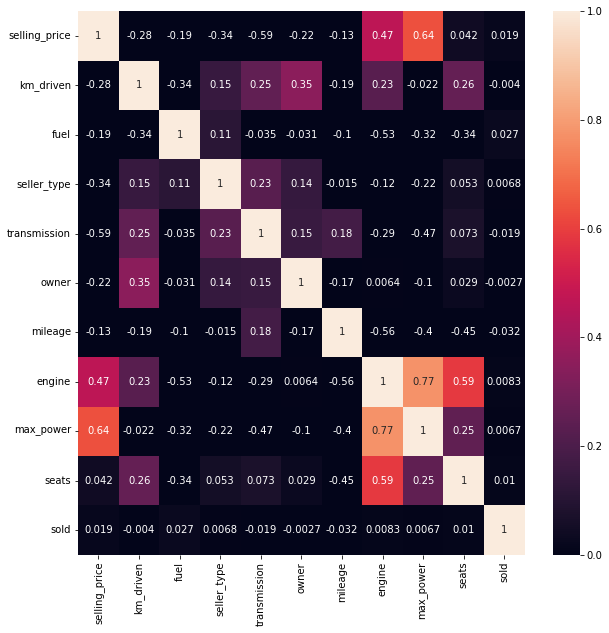

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmin=0, vmax=1, annot=True)

From the above results we can say that max_power and engine has high positive correlation with selling price

# Standardization

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()
scale=scaler.fit_transform(df1)
df_new=pd.DataFrame(scale,columns=df1.columns)
df_new

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,-0.245613,1.809263,-0.887058,0.277395,0.389408,-0.655358,0.923659,-0.406898,-0.521797,-0.434128,1.718430
1,-0.343950,1.217674,-0.887058,0.277395,0.389408,1.003442,0.455276,0.200378,0.491192,-0.434128,1.718430
2,-0.604542,1.681665,1.110117,0.277395,0.389408,2.662242,-0.555446,0.197949,-0.384536,-0.434128,1.718430
3,-0.522185,1.380071,-0.887058,0.277395,0.389408,-0.655358,0.923659,-0.047391,0.027248,-0.434128,1.718430
4,-0.638960,1.217674,1.110117,0.277395,0.389408,-0.655358,-0.801963,-0.285443,-0.034519,-0.434128,1.718430
...,...,...,...,...,...,...,...,...,...,...,...
7901,-0.405410,0.985678,1.110117,0.277395,0.389408,-0.655358,-0.308928,-0.530782,-0.218106,-0.434128,-0.581927
7902,-0.632814,1.194474,-0.887058,0.277395,0.389408,0.174042,-0.801963,0.188232,0.713555,-0.434128,-0.581927
7903,-0.329199,1.217674,-0.887058,0.277395,0.389408,-0.655358,-0.062411,-0.406898,-0.525229,-0.434128,-0.581927
7904,-0.442286,-0.986284,-0.887058,0.277395,0.389408,-0.655358,1.046917,-0.047391,-0.659058,-0.434128,-0.581927


# Model Building

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X=df_new.drop("selling_price", axis=1)
y=df_new['selling_price']

In [48]:
X_train, X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.2)

# 1. Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
linear=LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = linear.predict(X_test)

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_pred, y_test)

0.29158813248413873

In [54]:
import statsmodels.formula.api as smf
reg_model=smf.ols("y~X", data=df_new)
results=reg_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1147.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:07:26   Log-Likelihood:                -7672.3
No. Observations:                7906   AIC:                         1.537e+04
Df Residuals:                    7895   BIC:                         1.544e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -6.31e-17      0.007  -8.78e-15      1.000      -0.014       0.014
X[0]          -0.2012      0.009    -22.751      0.000      -0.219      -0.184
X[1]          -0.0473      0.011     -4.121      0.000      -0.070      -0.025
X[2]          -0.1258      0.008    -16.550      0.000      -0.141      -0.111
X[3]          -0.3022      0.009    -34.470      0.000      -0.319      -0.285
X[4]          -0.0433      0.008     -5.480      0.000      -0.059      -0.028
X[5]           0.1027      0.012      8.868      0.000       0.080       0.125
X[6]           0.2372      0.019     12.566      0.000       0.200       0.274
X[7]           0.3154      0.014     23.271      0.000       0.289       0.342
X[8]          -0.0635      0.010     -6.286      0.000      -0.083      -0.044
X[9]           0.0142      0.007      1.970      0.049    6.78e-05       0.028
==============================================================================
Omnibus:                     5214.368   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           133087.648
Skew:                           2.773   Prob(JB):                         0.00
Kurtosis:                      22.320   Cond. No.                         5.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
res = pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
res.head(10)

,Actual,Predicted
3641,-0.182923,0.043677
5531,-0.257905,-0.332879
3524,-0.626668,-0.905053
7478,-0.212425,-0.203303
3455,-0.036647,0.804143
5751,-0.331657,-0.021930
3125,-0.356242,-0.413174
5171,-0.571353,-0.155573
4055,-0.605771,-1.172191
2462,-0.061231,-0.137239


In [56]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_pred, y_test)
print(error)

0.4148793120353228


The mean squared error of linear regression model is 0.4149 which is quite high

# 2. Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(random_state=42)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [58]:
y_pred_rf=rf_reg.predict(X_test)
y_pred_rf

array([-0.1710613 , -0.10984669, -0.63390275, ..., -0.49895294,
        2.51639925, -0.04452633])

In [59]:
df_rf = pd.DataFrame({'Actual':y_test,"Predicted":y_pred_rf})
df_rf.head(10)

,Actual,Predicted
3641,-0.182923,-0.171061
5531,-0.257905,-0.109847
3524,-0.626668,-0.633903
7478,-0.212425,-0.199886
3455,-0.036647,-0.058333
5751,-0.331657,-0.305371
3125,-0.356242,-0.280040
5171,-0.571353,-0.589451
4055,-0.605771,-0.729048
2462,-0.061231,-0.157304


In [60]:
mean_error_rf=mean_squared_error(y_test,y_pred_rf)
print(mean_error_rf)

0.04238030489917891


In [61]:
r2_score(y_test, y_pred_rf)

0.9596585998911086

The mean squared error for Random Forest regressor is 0.0423 which is much low

# 3. Gradient Boosting Regressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)
np_y_train = y_train.to_numpy().ravel(); np_y_test = y_test.to_numpy().ravel()

In [64]:
gbt = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500, random_state=0)

gbt = gbt.fit(X_train, np_y_train)
mse = mean_squared_error(np_y_test, gbt.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0457


The mean squared error for Gradient Boosting regressor is 0.0457 which is closer with Random Forest regressor

# General Insights

1. It is expected that higher the max_power and engine capacity of a car, higher will be the selling price
2. This means a unit increase in max_power and engine capacity will lead to increase in the selling price of 0.3152 (32%) and 0.2373 (24%) units, respectively
3. Maruti and Hyundai are the two top most brands in the market
4. The state California and Texas have the highest selling price of 517080181 and 359711158, respectively
5. Mean Squared Error of Linear Regression, Random Forest and Gradient Boosting Regression models is 0.4149, 0.0423 and 0.0457, respectively
6. R2 score of Linear Regression and Random Forest is 0.29 and 0.959, respectively
7. From the above details, **Random Forest** model performed the best with an **R2 score of 0.96** and **MSE of 0.0423**.
